In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

#### Задание 1
1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [8]:
def calc_logloss(y, y_pred, salt = 1e-10):
    # добавим сравнение на экстримальные для логарифма значения и исправим если нужно
    pred = np.minimum(np.maximum(y_pred, salt), 1 - salt)
    #print(pred)
    err = - np.mean(y * np.log(pred) + (1.0 - y) * np.log(1.0 - pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1-1e-11, 1e-11])
calc_logloss(y1, y_pred1)

1.000000082790371e-10

In [10]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

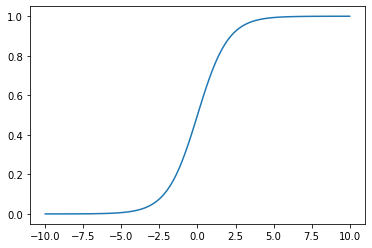

In [13]:
plt.plot(z, probabilities)

In [14]:
### Logistic Regression

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

#### Задание 2

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [16]:
W = eval_model(X_st, y, iterations=int(1e5), alpha=2099)
#W = eval_model(X_st, y, iterations=293050, alpha=1e-1)
#W = eval_model(X_st, y, iterations=590000, alpha=5e-2)

c:\users\vokiv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
20000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
30000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
40000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
50000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
60000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
70000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
80000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
90000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10
100000 [-13368.8287807   -1910.67363311  -2860.99915253  12292.03788249] 1.000000082790371e-10


#### Задание 6
 Могла ли модель переобучиться? Почему?
 
 Ответ: судя по коэффициентам - могла и переобучилась. Потомучто нет штрафов за большие коэффициенты - необходима регуляризация

#### Задание 7

Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [17]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T)+ lambda_ * np.sign(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [18]:
W = eval_model_l1(X_st, y, iterations=int(1e5), alpha=899)

c:\users\vokiv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10000 [-5328.12167521  -824.95750754 -1182.76682643  4887.15548299] 1.178729967027036e-07
20000 [-5328.22680253  -824.50731373 -1182.86660191  4886.87055567] 8.889392345209481e-08
30000 [-5328.26463132  -824.12434689 -1182.94214091  4886.65292689] 7.132272721383742e-08
40000 [-5328.27618783  -823.79331024 -1182.98967825  4886.46157037] 5.939600151515928e-08
50000 [-5328.27066214  -823.49931983 -1183.01664048  4886.28729606] 5.077150790218985e-08
60000 [-5328.25266771  -823.23281702 -1183.02826209  4886.12549049] 4.424549701777603e-08
70000 [-5328.22510672  -822.98748745 -1183.02805337  4885.97325148] 3.913581222360188e-08
80000 [-5328.18996328  -822.75896254 -1183.01845151  4885.82859492] 3.5027041593797105e-08
90000 [-5328.14866075  -822.54409749 -1183.00121275  4885.69009745] 3.165175685241165e-08
100000 [-5328.10225638  -822.34055367 -1182.97764356  4885.55670183] 2.883000824585273e-08


In [19]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [20]:
W = eval_model_l2(X_st, y, iterations=int(1e5), alpha=100)

c:\users\vokiv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10000 [-604.9430632   -81.39169582 -139.73542947  542.25819844] 0.00014909744399996182
20000 [-600.76347112  -82.2049321  -143.48888377  535.02294157] 0.0001225681261737335
30000 [-596.28223166  -82.8360965  -146.36940216  528.20291177] 0.0001056056976975472
40000 [-591.64777788  -83.29633867 -148.67773939  521.64854586] 9.374605229362925e-05
50000 [-586.92329544  -83.62494233 -150.57577686  515.29553928] 8.500444309333745e-05
60000 [-582.14510799  -83.85257835 -152.16482098  509.10646062] 7.831762919167778e-05
70000 [-577.33681632  -84.00144731 -153.51325149  503.05661241] 7.305808827653406e-05
80000 [-572.51483428  -84.08740091 -154.66917506  497.12868615] 6.883327188698506e-05
90000 [-567.73721647  -83.76839605 -155.23337849  491.46371377] 6.761117271712283e-05
100000 [-563.17907171  -82.2665438  -154.30654125  486.3622145 ] 7.108070489081383e-05


In [21]:
#from sklearn.linear_model import LogisticRegression as LR

####  Задание 3. 

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [22]:
def calc_pred_proba(W, X):
    return sigmoid(W.T@X)

In [23]:
calc_pred_proba(W, X_st)

array([3.60988216e-004, 8.25918065e-032, 1.00000000e+000, 5.46126684e-018,
       9.99990729e-001, 6.67554225e-010, 1.00000000e+000, 1.41254126e-110,
       9.99659573e-001, 1.00000000e+000])

####  Задание 4. 

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [24]:
def calc_pred(W,X, cutoff = 0.5):
    pred = calc_pred_proba(W, X) >= cutoff
    return pred.astype('int')
    

In [25]:
y_pred = calc_pred(W, X_st)


#### Задание 5 

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [26]:
y_pred =np.array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1])
print(y_pred)
print(y.astype('int'))

[1 0 0 0 0 0 1 0 1 1]
[0 0 1 0 1 0 1 0 1 1]


In [27]:
# матрица ошибок

TN = ((y_pred + y) == 0).sum()
TP = ((y_pred + y) == 2).sum()

FP = (y_pred > y).sum()
FN = (y_pred < y).sum()
FN
err_matrix = np.array([[TN, FP], [FN, TP]], dtype = 'int64')
err_matrix

array([[4, 1],
       [2, 3]], dtype=int64)

In [28]:
# точность 
precision = float(TP)/float(TP+FP)
precision

0.75

In [29]:
# полнота
recall = float(TP)/float(TP+FN)
recall

0.6

In [30]:
#F1 score
F1 = 2*recall*precision/(precision+recall)
F1

0.6666666666666665